In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('song_data.csv')
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


# Simple Regression

Our independent variable is danceability 


Our dependent variable is song_popularity

In [323]:
from sklearn import linear_model
y = df['song_popularity']
X = df[['danceability']]

R-squared: 0.010876433651685002
Intercept: 43.75957444652067
Slope: 14.576980359850884


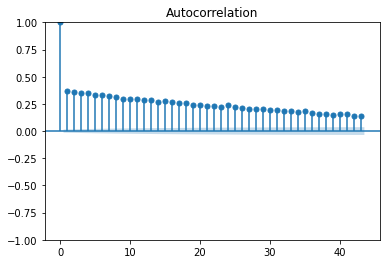

In [324]:
from sklearn.metrics import r2_score
model = linear_model.LinearRegression().fit(X, y)
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
intercept = model.intercept_
slope = model.coef_[0]

print("R-squared:", r_squared)
print("Intercept:", intercept)
print("Slope:", slope)


from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['song_popularity'])
plt.show()

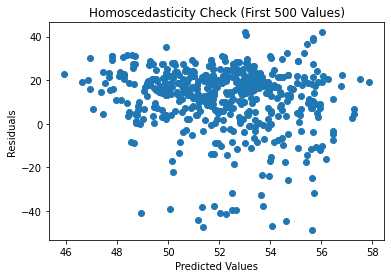

In [325]:
# Calculate the residuals
residuals = y - y_pred

# Create a scatter plot of residuals vs. predicted values for the first 20 values
plt.scatter(y_pred[:500], residuals[:500])
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check (First 500 Values)")
plt.show()


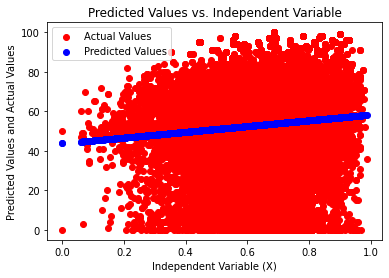

In [326]:
import matplotlib.pyplot as plt

# Plot the predicted values (y_pred) against the independent variable (X)
plt.scatter(X, y, label='Actual Values', color='red')
plt.scatter(X, y_pred, label='Predicted Values', color='blue')
plt.xlabel("Independent Variable (X)")
plt.ylabel("Predicted Values and Actual Values")
plt.legend()
plt.title("Predicted Values vs. Independent Variable")

plt.show()

### Dealing with residuals

<Axes: xlabel='song_popularity', ylabel='Density'>

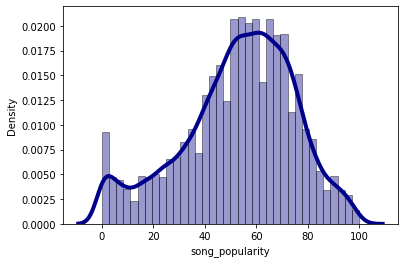

In [327]:
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
sns.distplot(df['song_popularity'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [328]:
#still not understandable if the curve is skewed or not

print('Song Popularity Skewness: ',df['song_popularity'].skew())
print('Song Popularity Skewness: ',df['danceability'].skew())

Song Popularity Skewness:  -0.501487468097605
Song Popularity Skewness:  -0.3917191171627551


<Axes: xlabel='danceability', ylabel='Density'>

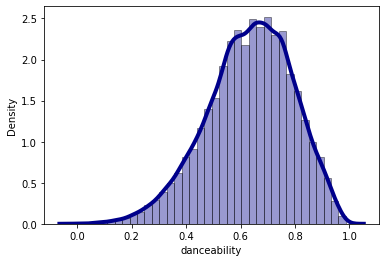

In [329]:
import seaborn as sns
sns.distplot(df['danceability'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

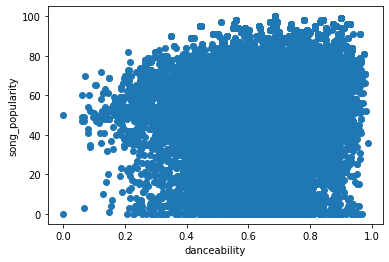

In [330]:

# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df['danceability'],df['song_popularity'])
 
# x-axis label
ax.set_xlabel('danceability')
 
# y-axis label
ax.set_ylabel('song_popularity')
plt.show()


Interquartil outlier removal

In [331]:


# IQR
Q1 = np.percentile(df['danceability'], 25, method='midpoint')
Q3 = np.percentile(df['danceability'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

0.21500000000000008


In [332]:


# Above Upper bound
upper=Q3+1.5*IQR
 
#Below Lower bound
lower=Q1-1.5*IQR


In [333]:
print("old shape:", df.shape)
upper_array = np.where(df['danceability'] >= upper)
lower_array = np.where(df['danceability'] <= lower)
df.drop(upper_array[0], inplace=True)
df.drop(lower_array[0], inplace=True)
print("new shape:", df.shape)

old shape: (18835, 15)
new shape: (18702, 15)


In [334]:
from sklearn import linear_model
y = df['song_popularity']
X = df[['danceability']]

from sklearn.metrics import r2_score
model = linear_model.LinearRegression().fit(X, y)
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
intercept = model.intercept_
slope = model.coef_[0]

print("R-squared:", r_squared)
print("Intercept:", intercept)
print("Slope:", slope)

R-squared: 0.010519444355870489
Intercept: 43.60061198739189
Slope: 14.807974834084451


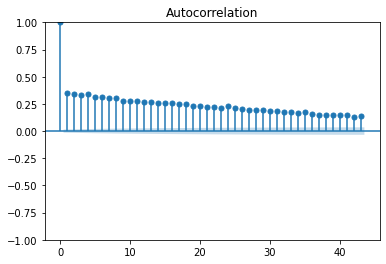

In [ ]:
#calculate acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(model.resid)
plt.show()

# Multiple Regression

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [ ]:
from sklearn import linear_model
df = pd.read_csv('song_data.csv')
y = df['song_popularity']
X = df[['song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo',
       'audio_valence']]

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
y_pred = regr.predict(X)
r_squared = r2_score(y, y_pred)
r_squared

0.045814975569725025

In [ ]:
coefficients = regr.coef_
intercept = regr.intercept_
print(coefficients)
print(intercept)

[-5.12506453e-06 -4.23719460e+00  1.29810453e+01 -1.15689192e+01
 -1.03489545e+01 -6.41537580e-02 -4.45814869e+00  6.99091415e-01
  2.16972550e-01 -2.11784380e+00 -1.14121275e-02 -8.71444454e+00]
67.66262793124667


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     75.31
Date:                Thu, 26 Oct 2023   Prob (F-statistic):          2.64e-181
Time:                        18:33:37   Log-Likelihood:                -84422.
No. Observations:               18835   AIC:                         1.689e+05
Df Residuals:                   18822   BIC:                         1.690e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               67.6626      1.919     35.253      0.000      63.901      71.425
song_duration_ms -5.125e-06   2.66e-06     -1.925      0.054   -1.03e-05    9.33e-08
acousticness        -4.2372      0.759     -5.586      0.000      -5.724      -2.750
danceability        12.9810      1.185     10.954      0.000      10.658      15.304
energy             -11.5689      1.404     -8.241      0.000     -14.321      -8.817
instrumentalness   -10.3490      0.786    -13.161      0.000     -11.890      -8.808
key                 -0.0642      0.044     -1.464      0.143      -0.150       0.022
liveness            -4.4581      1.111     -4.012      0.000      -6.636      -2.280
loudness             0.6991      0.070     10.016      0.000       0.562       0.836
audio_mode           0.2170      0.332      0.654      0.513      -0.434       0.868
speechiness         -2.1178      1.568     -1.350      0.177      -5.192       0.956
tempo               -0.0114      0.006     -2.036      0.042      -0.022      -0.000
audio_valence       -8.7144      0.753    -11.580      0.000     -10.189      -7.239
==============================================================================
Omnibus:                      987.222   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1148.838
Skew:                          -0.603   Prob(JB):                    3.41e-250
Kurtosis:                       2.915   Cond. No.                     3.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""